# Get and explore dataset

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import re

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [4]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [5]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [6]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

In [7]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=3000)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19, 492, 493], [2, 830, 4, 2, 831], [131], [6, 308, 4, 832], [1, 12, 3]]


# **Write some code to investigate the dataset**
## 1. Calculate and report the mean review size, its standard deviation and create a boxplot.

In [8]:
# import seaborn plotting library
import seaborn as sns

# add styling to plotting libraries
sns.set_theme(style='darkgrid')

In [9]:
# assigning a variable is much more better so if at a later stage the input data
# changes in terms of the variable, we can easily implement the change
X = data

# get review length
print("Review Summary")
review_len = [len(x) for x in X]

mean_review = round(np.mean(review_len),2)
print('Mean Review Size: ',mean_review)

std_review = round(np.std(review_len),3)
print('Standard Deviation: ',std_review)

Review Summary
Mean Review Size:  24.68
Standard Deviation:  11.284


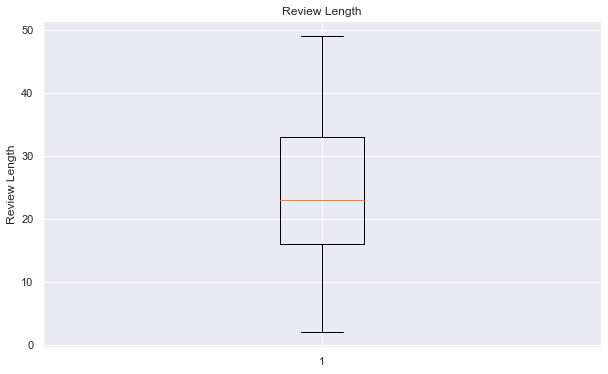

In [10]:
# plot review length
fig, ax = plt.subplots(figsize=(10,6))
plt.boxplot(review_len)
plt.title("Review Length")
plt.ylabel("Review Length")
plt.show()

## 2. Calculate the number of unique words in the dataset

In [11]:
# stack array sequence horizontally and then find the unique
# elements in teh array
words = np.unique(np.hstack(X))
words_len = len(words)
print('Number of words: ',words_len)

Number of words:  1676


## 3. Perform any other dataset investigation that you feel would be valuable
 

In [12]:
print("Number of words in the sample texts: ({0}, {1})".format(len(tokenized_data[0]), len(tokenized_data[1])))

Number of words in the sample texts: (6, 5)


In [15]:
np.max(tokenized_data)

[2557, 6, 226]

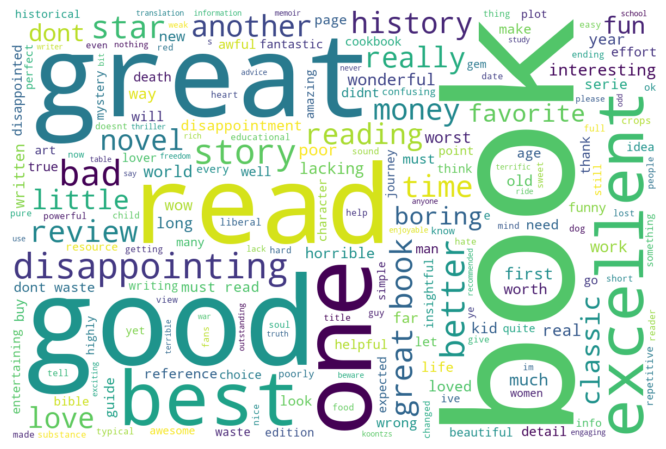

In [25]:
# import wordcloud library
from wordcloud import WordCloud, STOPWORDS

# assign the data
text = " ".join(data)

# create wordcloud visualizations
word = WordCloud(width=1200, height=800, margin=10, background_color='white').generate(text)
plt.figure(figsize=(12,8))
plt.imshow(word, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

# **Pre-processing**

In [457]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length

# import pad_sequences
from tensorflow.keras.preprocessing import sequence

# set max length to 20 due to the length of words in the sentences being <= 20 
maxlen = 24

# Set X_data
pad_dataX = sequence.pad_sequences(tokenized_data , maxlen=maxlen)

Since the tokenized data is the positive and negative reviews combined. We know that the top parts are the positive reviews and the rest are negative. Using this information, I created dataframes and assigned dummy values where 0 = positive and 1 = negative review. Then concatenate that into a single dataframe with corresponding token and review to get the X and Y with no shape errors

In [458]:
# create list from positive reviews = [1,0]
'''
for positive results, 1 will be in first index while 0 will be in the second index
this is because of using the softmax function
'''
# list to store the values
pos = []

# loop for positive reviews
for pos_rev in range(len(positive)):
    pos.append([1,0])

# convert to an array
pos = np.array(pos)
    

# create list from negative reviews = [0,1]
'''
for negative results, 0 will be in first index while 1 will be in the second index
this is because of using the softmax function
'''
# list to store the values
neg = []

# loop for positive reviews
for neg_rev in range(len(negative)):
    neg.append([0,1])

# convert to an array
neg = np.array(neg)


# and stack them together
stack = (pos,neg)
pad_dataY = (np.concatenate(stack))

### Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

In [459]:
# import data splitting library for machine learning
from sklearn.model_selection import train_test_split

# Assign the data
X = pad_dataX
Y = pad_dataY

# split the data 80% train, 20% test and set shuffle True
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# display the shape of the data
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

print('\nSee the data:\n',X_test)

X_train shape:  (1434, 24)
Y_train shape:  (1434, 2)
X_test shape:  (359, 24)
Y_test shape:  (359, 2)

See the data:
 [[   0    0    0 ...    8  478  224]
 [   0    0    0 ... 1027    4  263]
 [   0    0    0 ...  604   44  140]
 ...
 [   0    0    0 ...  174    5   65]
 [   0    0    0 ...  445 1856  219]
 [   0    0    0 ...    0    0   70]]


In [460]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, Y_test):      
    
    # make predictions
    Y_pred = model.predict(X_test)
    
    
    # confusion matrix
    Y_pred = to_class(Y_pred)
    Y_test = to_class(Y_test)    
    
    cm = confusion_matrix(Y_test, Y_pred)
    print('Confusion Matrix:\n', cm)
    
    # Classification Report
    cr = classification_report(Y_test, Y_pred, zero_division= 0)
    print(cr)

# Build and tune model

Define network architecture

In [461]:
from tensorflow.keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, SpatialDropout1D, BatchNormalization, Dense

In [462]:
# create instance of the model
model = Sequential()

# add the layers
'''
input_dim has to be vocab sizedue to the model having to remember the tokens
input_length has to be maxlen (the sentence vectors of the tokenized words)
''' 
embedding_layer = Embedding(input_dim=vocab_size, output_dim=2 , input_length=maxlen)
model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

Train model

In [463]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']
             )

In [464]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 24, 2)             5120      
                                                                 
 spatial_dropout1d_16 (Spati  (None, 24, 2)            0         
 alDropout1D)                                                    
                                                                 
 batch_normalization_16 (Bat  (None, 24, 2)            8         
 chNormalization)                                                
                                                                 
 lstm_16 (LSTM)              (None, 32)                4480      
                                                                 
 dense_16 (Dense)            (None, 2)                 66        
                                                                 
Total params: 9,674
Trainable params: 9,670
Non-train

In [465]:
# Fit the data to the model
batch_size = 10
epochs = 5

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 )

Epoch 1/5
115/115 [==============================] - 4s 14ms/step - loss: 0.6925 - accuracy: 0.5161 - val_loss: 0.6922 - val_accuracy: 0.5331
Epoch 2/5
115/115 [==============================] - 1s 10ms/step - loss: 0.6363 - accuracy: 0.6486 - val_loss: 0.6814 - val_accuracy: 0.5889
Epoch 3/5
115/115 [==============================] - 1s 12ms/step - loss: 0.4168 - accuracy: 0.8213 - val_loss: 0.6241 - val_accuracy: 0.6760
Epoch 4/5
115/115 [==============================] - 1s 10ms/step - loss: 0.2387 - accuracy: 0.9119 - val_loss: 0.6240 - val_accuracy: 0.6864
Epoch 5/5
115/115 [==============================] - 1s 11ms/step - loss: 0.1693 - accuracy: 0.9355 - val_loss: 0.6813 - val_accuracy: 0.6969


Examine performance of model

In [466]:
assess_model(model, X_test, Y_test)

Confusion Matrix:
 [[128  48]
 [ 53 130]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       176
           1       0.73      0.71      0.72       183

    accuracy                           0.72       359
   macro avg       0.72      0.72      0.72       359
weighted avg       0.72      0.72      0.72       359



In [467]:
score = model.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.7187


Plot graphs for accuracy and loss

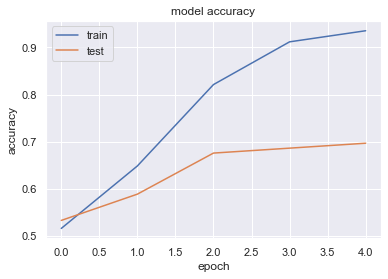

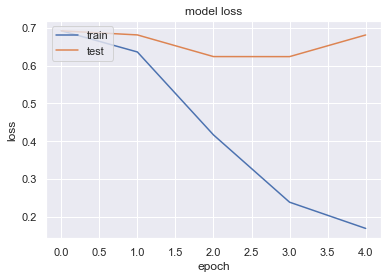

In [468]:
# Plot graphs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Make a prediction

In [469]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = sequence.pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does.

prediction = model.predict(padded)

# You can call the helper function "to_word_label" to map the output of the model to the name of the class it was predicted to belong to.

to_word_label(prediction)


['positive', 'positive', 'positive', 'negative', 'negative']